### Homework
    modify the code below by replacinf the fitness function.
    You can choose one of two fitness functions, please indicate which one you work on
    Option a:
    Instead of doing NK, the sum of the numbers in the genome define fitness
    This is rather easy, so once that is done, explore how large genomes (N~20, ~40, ~100)
    perform in this environment
    Option b:
    Make the checkerboard fitness function. There you count how many numbers in the genome
    sequence are identical. If the number flips you get rewarded if the next sequence of numbers
    is as long as the first. Example:
    Genome: 1100110011
    Length   2 2 2 2 2
    Fitness 10
    
    Genome: 1010110110
    Length  1 1 1 1 2 1 2 1
    Fitness 4 (the first four ones are summed then the sequence has none matching lengths)
    
    It becomes interesting to see what the diversity of solutions looks like

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
from pandas import *
import random

In [3]:
def makePopulation(N,popSize):
    #N equals the size of the genome
    population=list()
    for p in range(popSize):
        genome=list()
        #each genome is a list within the single large list
        for n in range(N):
            genome.append(random.randint(0,1))
        population.append(genome)
    return population

print makePopulation(5,10)

[[0, 0, 1, 0, 0], [1, 1, 1, 1, 1], [0, 0, 1, 1, 0], [1, 1, 0, 1, 1], [1, 0, 1, 0, 0], [1, 0, 0, 0, 0], [0, 1, 0, 1, 1], [0, 0, 0, 1, 1], [0, 1, 0, 1, 1], [1, 0, 0, 1, 1]]


In [7]:
def computeFitness(genome):
    fitness=sum(genome) #sum of the fitness for each individual
    return fitness
    
print computeFitness([1,1,1,0,0])

3


In [8]:
def makeMutant(genome,mutationRate):
    newGenome=list()
    for i in range(len(genome)): #goes through each zero or one in an individual to decide if will mutate that gene
        if random.uniform(0.0,1.0)<mutationRate: #randomly drawing a random number between 0 and 1 to decide if will mutate
            newGenome.append(1-genome[i])
        else:
            newGenome.append(genome[i])
    return newGenome

random.seed(0)

print makeMutant([0,0,0,0,0],0.3)

[0, 0, 0, 1, 0]


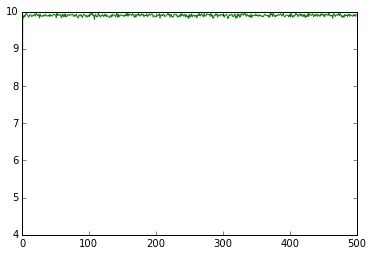

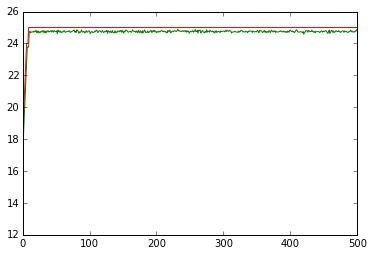

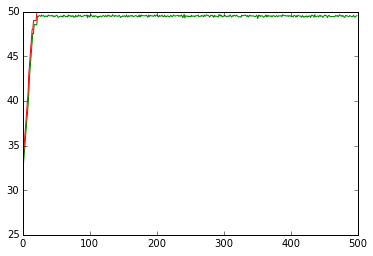

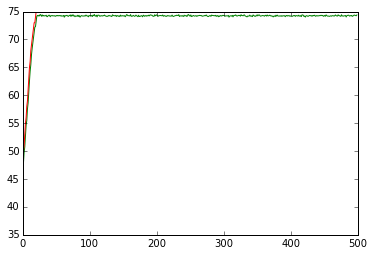

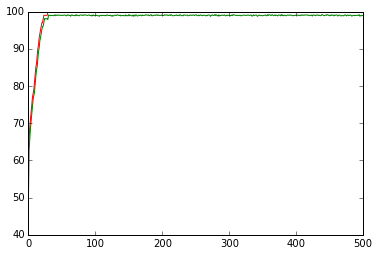

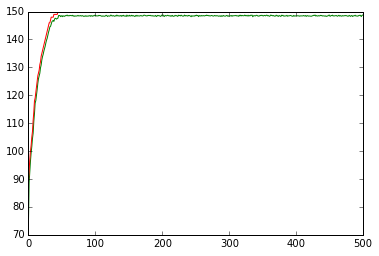

In [10]:
random.seed(0)

#create a population
differentgenomesizes=(10,25,50,75,100,150)
for N in differentgenomesizes: #to test difference between different genome sizes
    popSize=100 #number of individuals
    population=makePopulation(N,popSize)
    generations=500
    mutationRate=0.01

    meanW=list() #mean fitness
    maxW=list() #max fitness

    for generation in range(generations):#for the current generation
        W=list()
        for i in range(len(population)):
            W.append(computeFitness(population[i])) #computing the fitness of the population

        nextGeneration=list() #creating an empty list for the next generation
        meanW.append(mean(W)) #filling in these values
        highestFitness=max(W)
        maxW.append(highestFitness)

        while len(nextGeneration)<popSize: #filling the next generation list
            who=random.randint(0,popSize-1)
            while (random.uniform(0.0,1.0)>(W[who]/highestFitness)): #needs to be greater than the realitive fitness
                who=random.randint(0,popSize-1)
            nextGeneration.append(makeMutant(population[who],mutationRate)) #send to mutation function to decide if will be mutated
        population=list(nextGeneration)

    figure()
    plot(meanW,'g')
    plot(maxW,'r')